In [564]:
%pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [565]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyreadstat

In [566]:
raw_welfare = pd.read_spss("./data/Koweps_hpwc14_2019_beta2.sav")

In [567]:
welfare = raw_welfare.copy()

In [568]:
welfare.head()

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN


In [569]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [570]:
welfare.shape

(14418, 830)

In [571]:
welfare = welfare.rename(
    columns={
        'h14_g3' : 'sex',
        'h14_g4' : 'birth',
        'h14_g10' : 'marriage_type',
        'h14_g11':'religion',
        'p1402_8aq1' : 'income',
        'h14_eco9' : 'code_job',
        'h14_reg7': 'code_region'
    }
)

In [572]:
welfare[['sex','birth','marriage_type', 'religion', 'income', 'code_job', 'code_region']]

,sex,birth,marriage_type,religion,income,code_job,code_region
0,2.0,1945.0,2.0,1.0,NaN,NaN,1.0
1,1.0,1948.0,2.0,2.0,NaN,NaN,1.0
2,1.0,1942.0,3.0,1.0,107.0,762.0,1.0
3,1.0,1962.0,1.0,1.0,192.0,855.0,1.0
4,2.0,1963.0,1.0,1.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...
14413,2.0,1967.0,1.0,1.0,NaN,NaN,5.0
14414,2.0,1992.0,5.0,1.0,NaN,NaN,5.0
14415,1.0,1995.0,5.0,1.0,NaN,910.0,5.0
14416,2.0,1998.0,5.0,1.0,200.0,246.0,5.0


In [573]:
welfare['sex'].dtype

dtype('float64')

In [574]:
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [575]:
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex']) # np.where(조건, 조건에 부합할 경우, 아닌 경우)
welfare['sex'].isna().sum()

0

In [576]:
welfare['sex'] = np.where(welfare['sex']== 1, 'male', 'female')

In [577]:
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

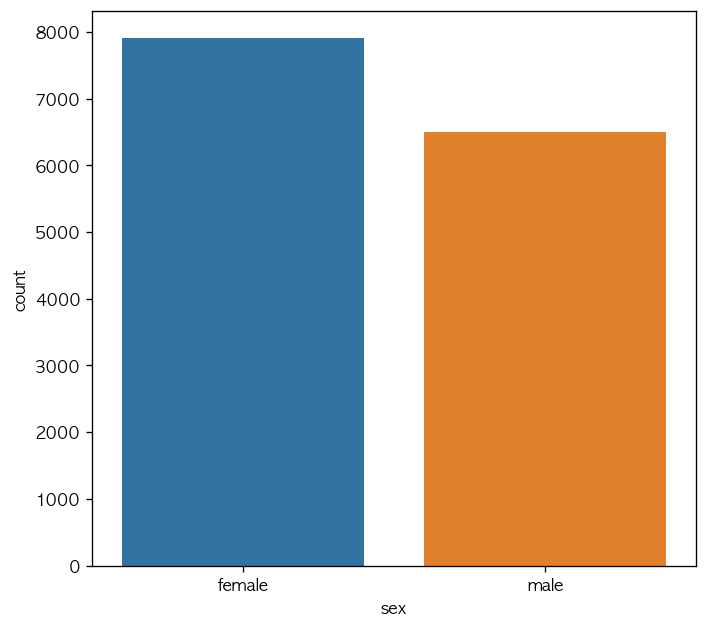

In [578]:
sns.countplot(data=welfare, x='sex')

In [579]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income', ylabel='Count'>

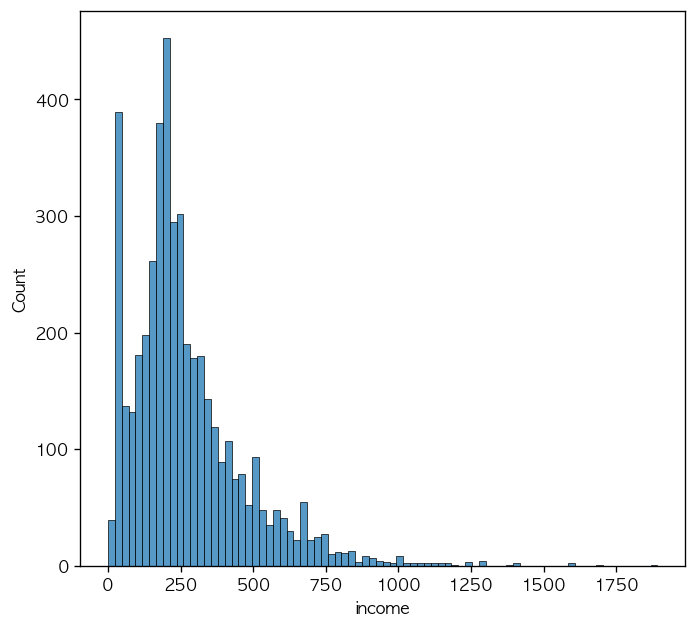

In [580]:
sns.histplot(data=welfare, x='income')

In [581]:
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [582]:
welfare['income'].isna().sum()

9884

In [583]:
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [584]:
welfare['income'].isna().sum()

9884

In [585]:
sex_income = welfare.dropna(subset=['income']).groupby('sex', as_index=False).agg(mean_income = ('income', 'mean'))

In [586]:
sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

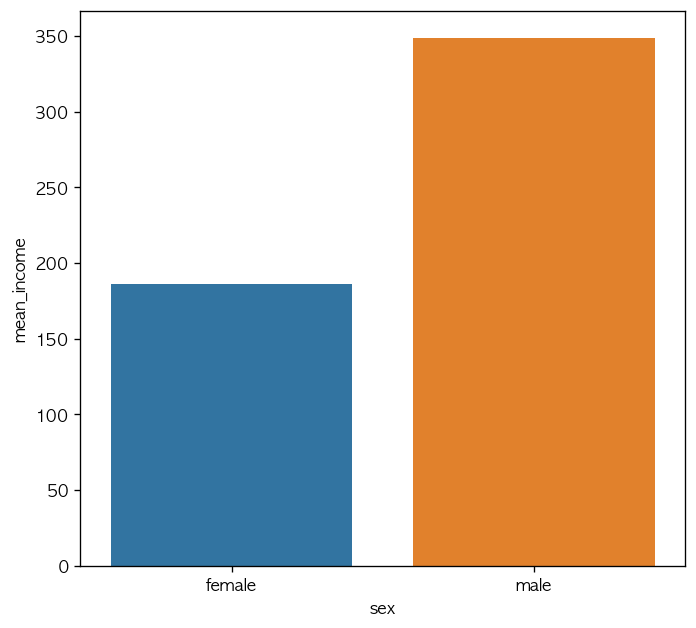

In [587]:
sns.barplot(data = sex_income, x='sex', y='mean_income')

In [588]:
welfare['birth'].dtypes

dtype('float64')

In [589]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='birth', ylabel='Count'>

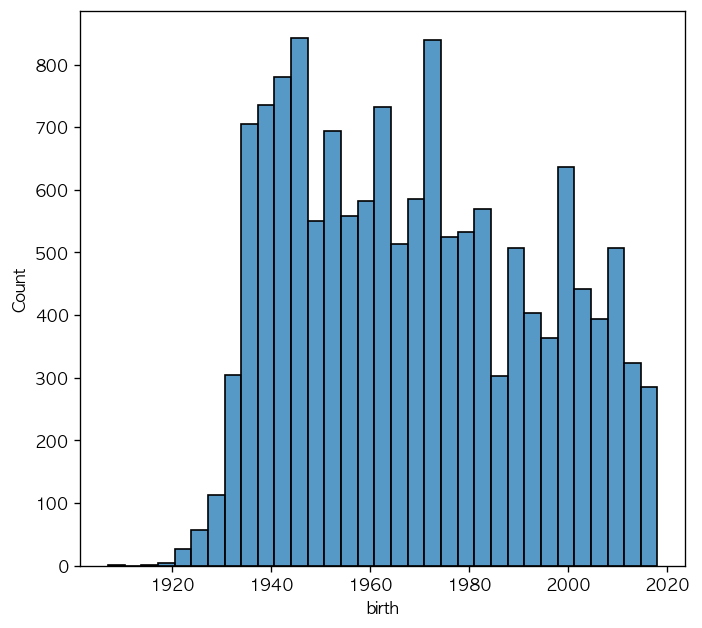

In [590]:
sns.histplot(data=welfare, x='birth')

In [591]:
welfare['birth'].isna().sum()

0

In [592]:
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

In [593]:
welfare['birth'].isna().sum()

0

In [594]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

In [595]:
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

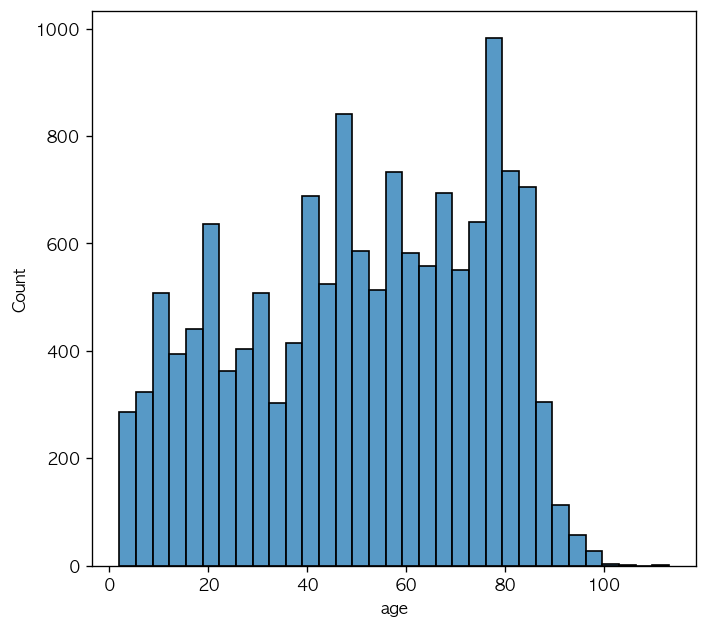

In [596]:
sns.histplot(data=welfare, x='age')

In [597]:
age_income = welfare.dropna(subset= 'income').groupby('age').agg(mean_income = ('income', 'mean'))

In [598]:
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='mean_income'>

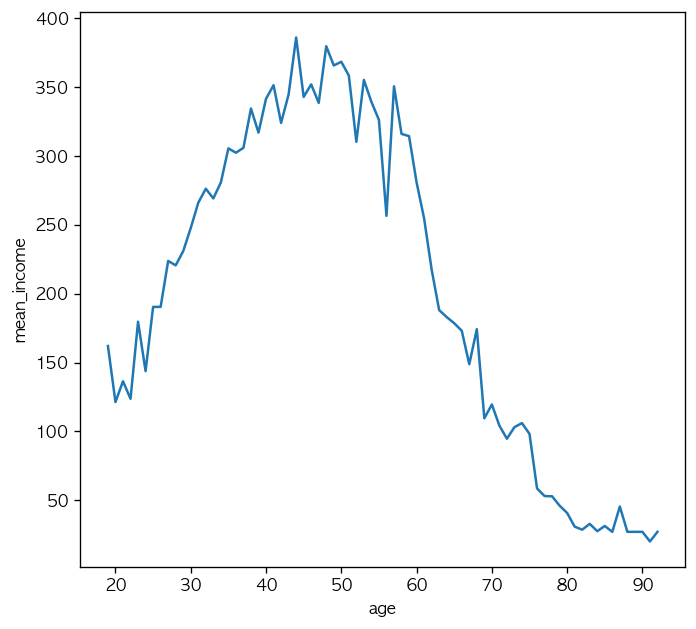

In [599]:
sns.lineplot(data=age_income, x='age', y='mean_income')

In [600]:
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [601]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                         np.where(welfare['age'] <= 59, 'middle', 'old')))

In [602]:
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

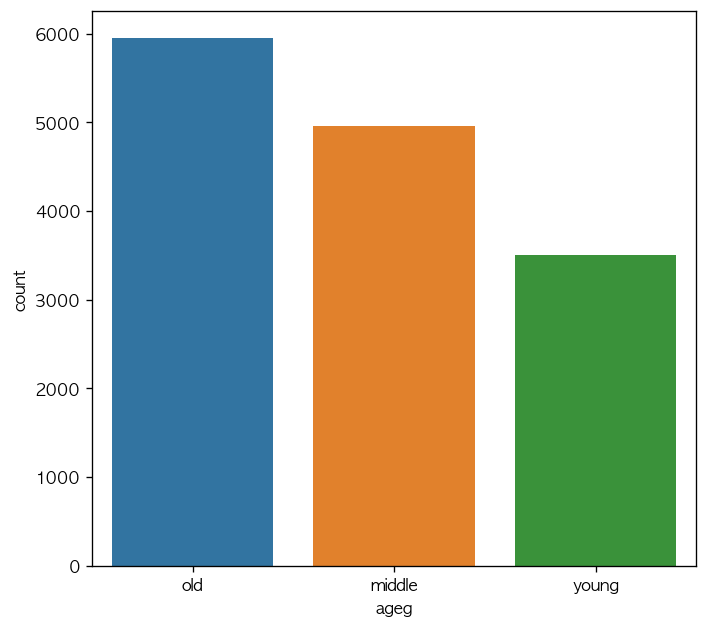

In [603]:
sns.countplot(data = welfare, x = 'ageg')

In [604]:
ageg_income = welfare.dropna(subset = 'income').groupby('ageg', as_index= False).agg(mean_income = ('income', 'mean'))

In [605]:
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

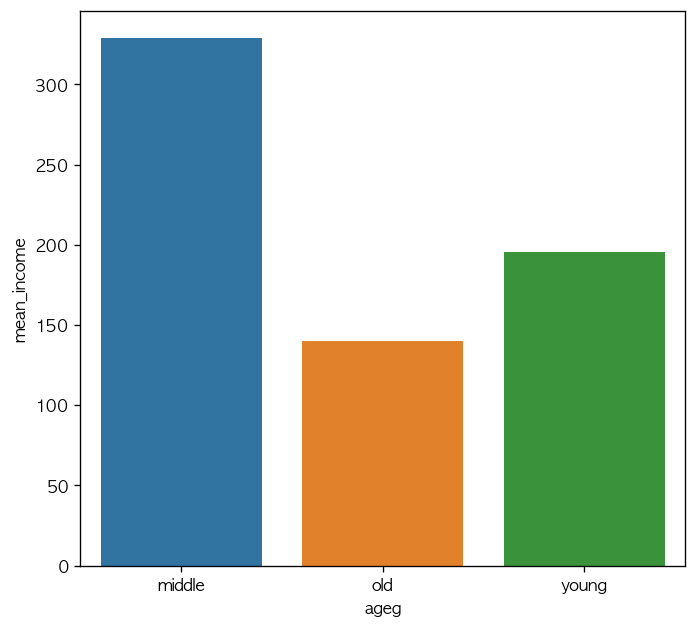

In [606]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

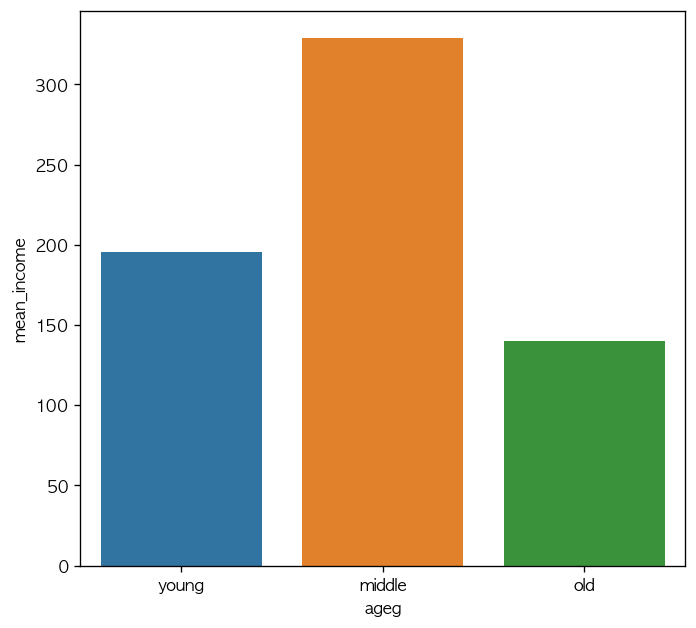

In [607]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

In [608]:
sex_income = welfare.dropna(subset=['income']).groupby(['ageg', 'sex'], as_index=False).agg(mean_income = ('income', 'mean'))

In [609]:
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

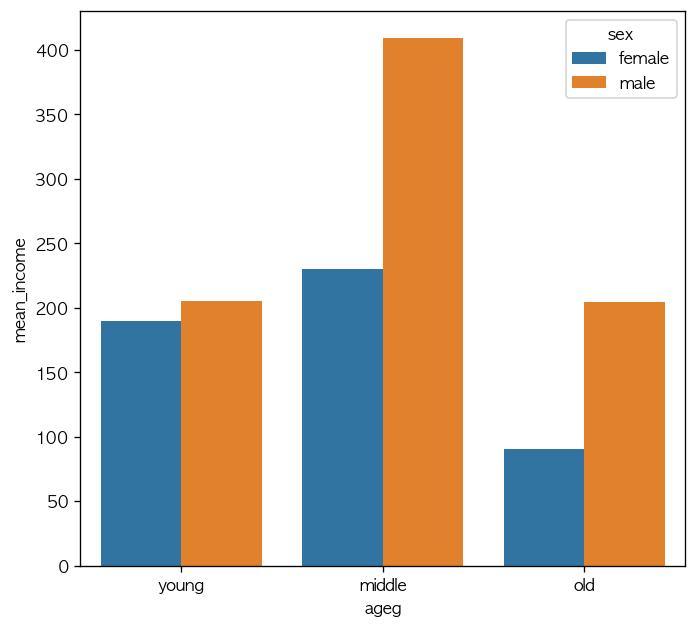

In [610]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex', order = ['young', 'middle', 'old'])

In [611]:
sex_age = welfare.dropna(subset=['income']).groupby(['age', 'sex'], as_index= False).agg(mean_income = ('income', 'mean'))

In [612]:
sex_age.head()

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='mean_income'>

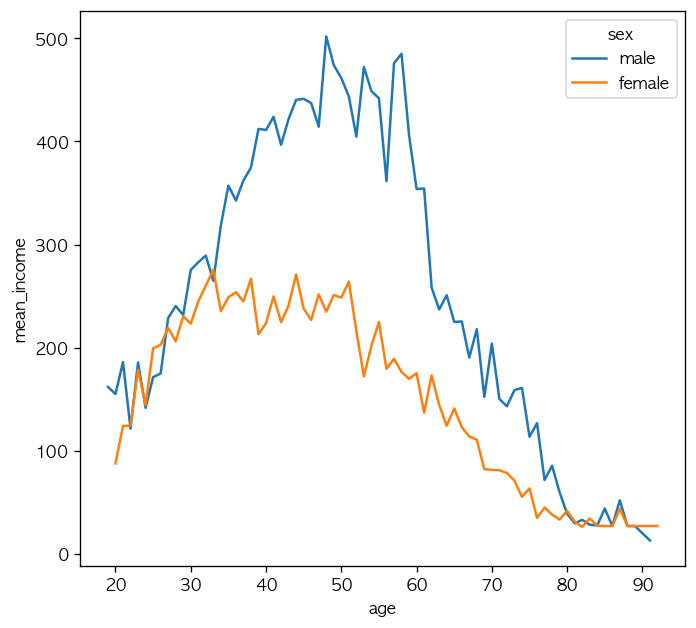

In [613]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

In [614]:
welfare['code_job'].dtypes

dtype('float64')

In [615]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [616]:
list_job = pd.read_excel("./data/Koweps_Codebook_2019.xlsx", sheet_name='직종코드')

In [617]:
list_job.head(10)

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
5,132,보험 및 금융 관리자
6,133,보건 및 사회복지 관련 관리자
7,134,문화∙예술 관련 관리자
8,135,정보 통신 관련 관리자
9,139,기타 전문 서비스 관리자


In [618]:
list_job.shape

(156, 2)

In [619]:
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [620]:
welfare.dropna(subset= ['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [621]:
job_income = welfare.dropna(subset=['job', 'income']).groupby('job', as_index=False).agg(mean_income=('income', 'mean'))

In [622]:
job_income

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000
...,...,...
142,화학∙고무 및 플라스틱 제품 생산기 조작원,452.714286
143,화학공학 기술자 및 시험원,489.500000
144,환경∙청소 및 경비 관련 관리자,201.000000
145,환경공학∙가스·에너지 기술자 및 시험원,511.000000


In [623]:
top10 = job_income.sort_values('mean_income', ascending= False).head(10)

In [624]:
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [625]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

<Axes: xlabel='mean_income', ylabel='job'>

/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


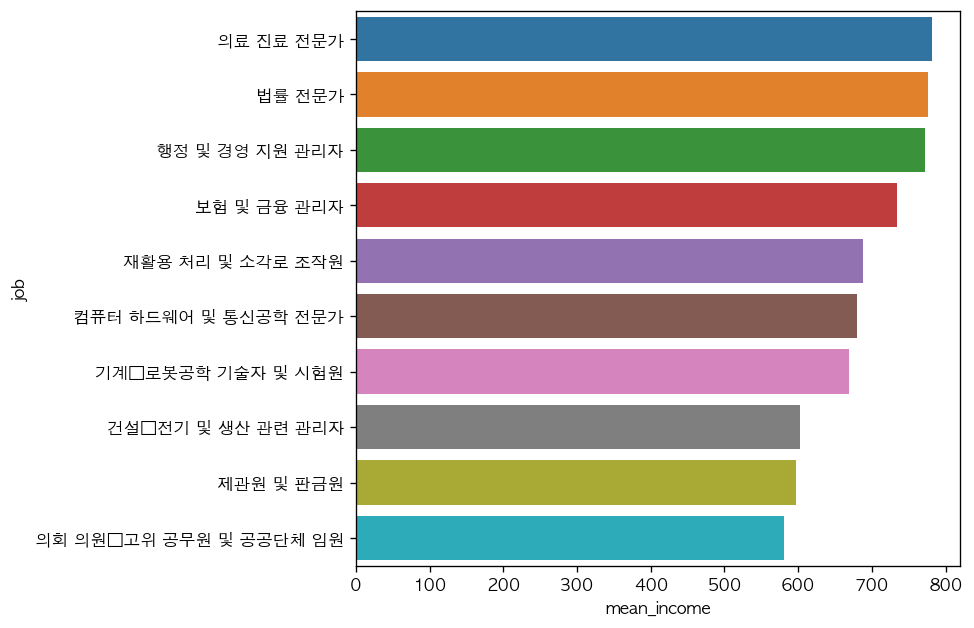

In [626]:
sns.barplot(data = top10, y = 'job', x = 'mean_income')

In [627]:
bottom10 = job_income.sort_values('mean_income').head(10)

In [628]:
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 200.0)]

/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  func(*args, **kwargs)
/Users/samoyed/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


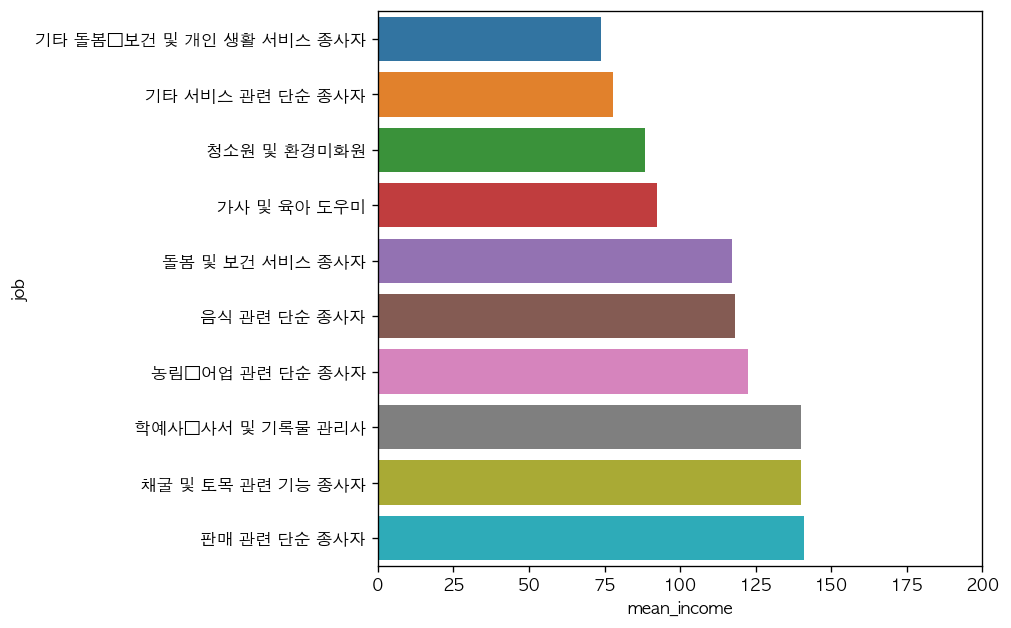

In [629]:
sns.barplot(data = bottom10, y = 'job', x = 'mean_income').set(xlim = (0, 200))

In [630]:
job_male = welfare.dropna(subset= 'job').query('sex == "male"').groupby('job', as_index= False).agg(n = ('job', 'count')).sort_values('n', ascending=False).head(10)

In [631]:
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [632]:
job_female = welfare.dropna(subset='job').query('sex == "female"').groupby('job', as_index=False).agg(n = ('job', 'count')).sort_values('n', ascending=False).head(10)

In [633]:
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

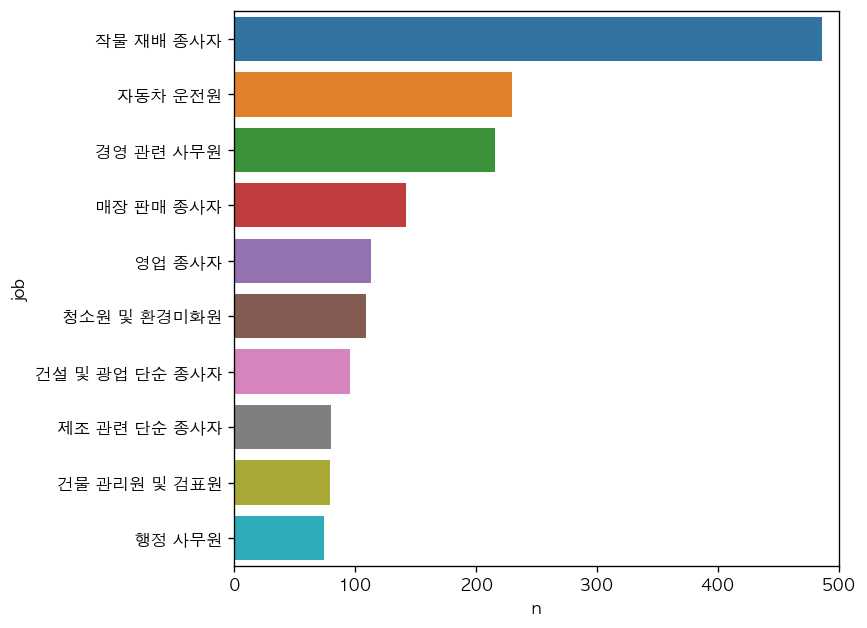

In [634]:
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = [0, 500])

[(0.0, 500.0)]

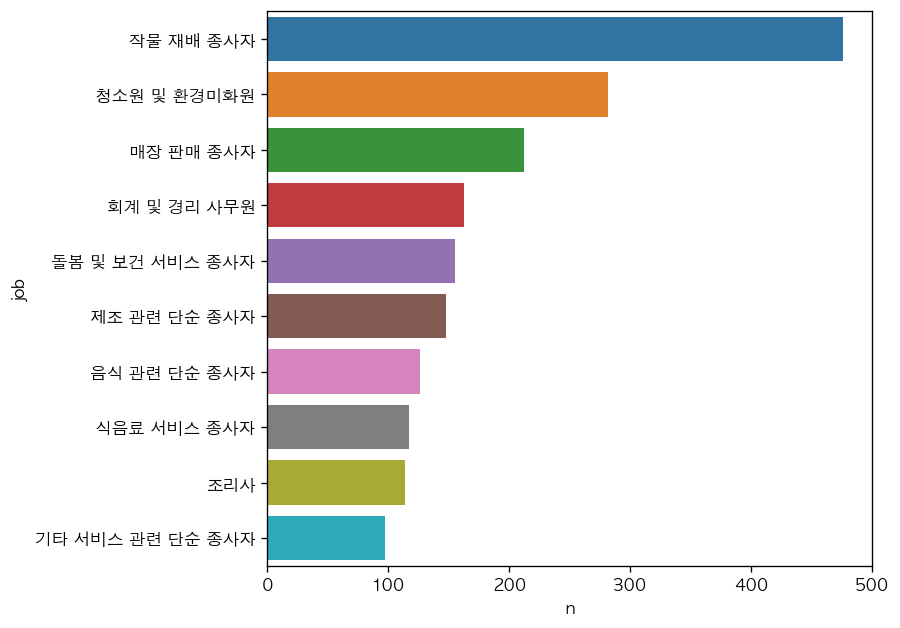

In [635]:
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim=[0, 500])

In [636]:
welfare['religion'].dtype

dtype('float64')

In [637]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [638]:
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

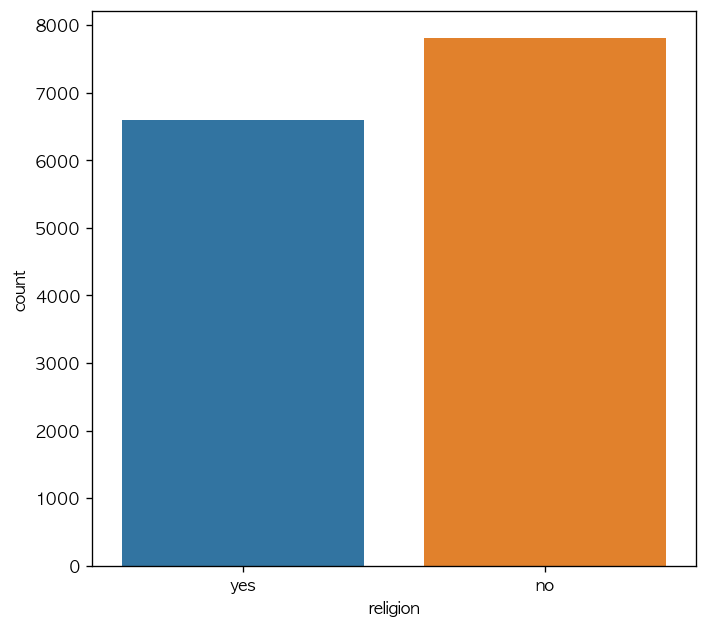

In [639]:
# 막대 그래프 만들기
sns.countplot(data = welfare, x = 'religion')

In [640]:
welfare['marriage_type'].dtypes  # 변수 타입 출력

dtype('float64')

In [641]:
welfare['marriage_type'].value_counts()  # 빈도 구하기

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [642]:
# 이혼 여부 변수 만들기
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                      np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

In [643]:
## 이혼 여부별 빈도

# marriage별 분리
# marriage별 빈도 구하기
n_divorce = welfare.groupby('marriage', as_index = False) \
                   .agg(n = ('marriage', 'count'))
n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

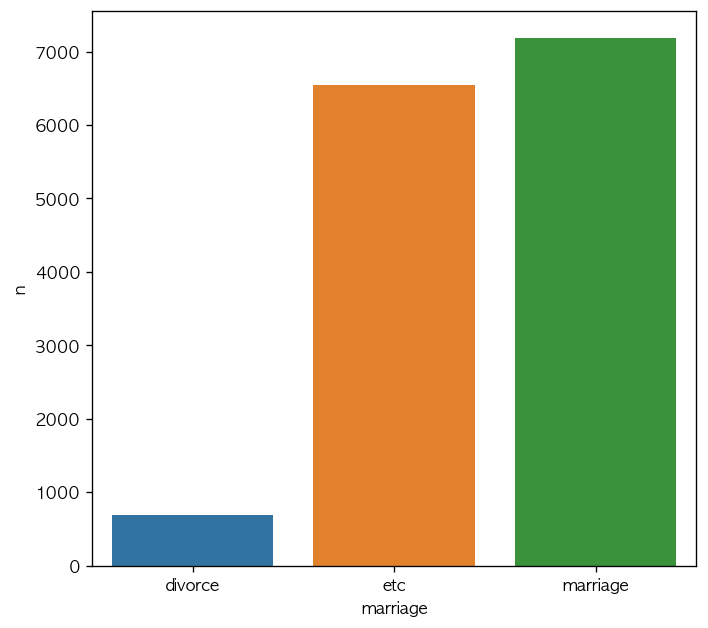

In [644]:
# 막대 그래프 만들기
sns.barplot(data = n_divorce, x = 'marriage', y = 'n')

In [645]:
# etc 제외
# religion별 분리
# marriage 추출
# 비율 구하기
rel_div = welfare.query('marriage != "etc"') \
                 .groupby('religion', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
rel_div

,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531


In [646]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
rel_div = rel_div.query('marriage == "divorce"') \
                 .assign(proportion = rel_div['proportion'] * 100) \
                 .round(1)
rel_div

,religion,marriage,proportion
1,no,divorce,9.5
3,yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

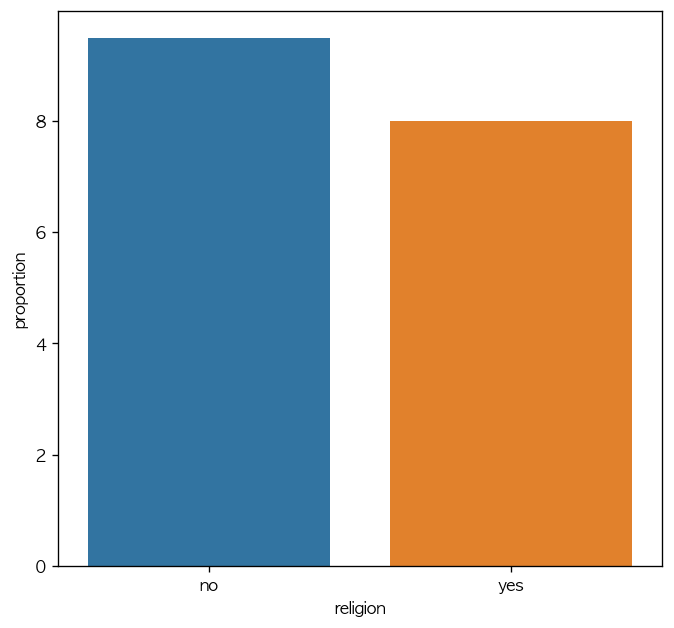

In [647]:
# 막대 그래프 만들기
sns.barplot(data = rel_div, x = 'religion', y = 'proportion')

In [648]:
# etc 제외
# ageg별 분리
# marriage 추출
# 비율 구하기
age_div = welfare.query('marriage != "etc"') \
                 .groupby('ageg', as_index = False) \
                 ['marriage'] \
                 .value_counts(normalize = True)
age_div

,ageg,marriage,proportion
0,middle,marriage,0.910302
1,middle,divorce,0.089698
2,old,marriage,0.914220
3,old,divorce,0.085780
4,young,marriage,0.950000
5,young,divorce,0.050000


In [649]:
## 연령대 및 이혼 여부별 빈도

# etc 제외
# ageg별 분리
# marriage 추출
# 빈도 구하기
welfare.query('marriage != "etc"') \
       .groupby('ageg', as_index = False) \
       ['marriage'] \
       .value_counts()

,ageg,marriage,count
0,middle,marriage,3552
1,middle,divorce,350
2,old,marriage,3581
3,old,divorce,336
4,young,marriage,57
5,young,divorce,3


In [650]:
# 초년층 제외, 이혼 추출
# 백분율로 바꾸기
# 반올림
age_div = age_div.query('ageg != "young" & marriage == "divorce"') \
                 .assign(proportion = age_div['proportion'] * 100) \
                 .round(1)
age_div

,ageg,marriage,proportion
1,middle,divorce,9.0
3,old,divorce,8.6


<Axes: xlabel='ageg', ylabel='proportion'>

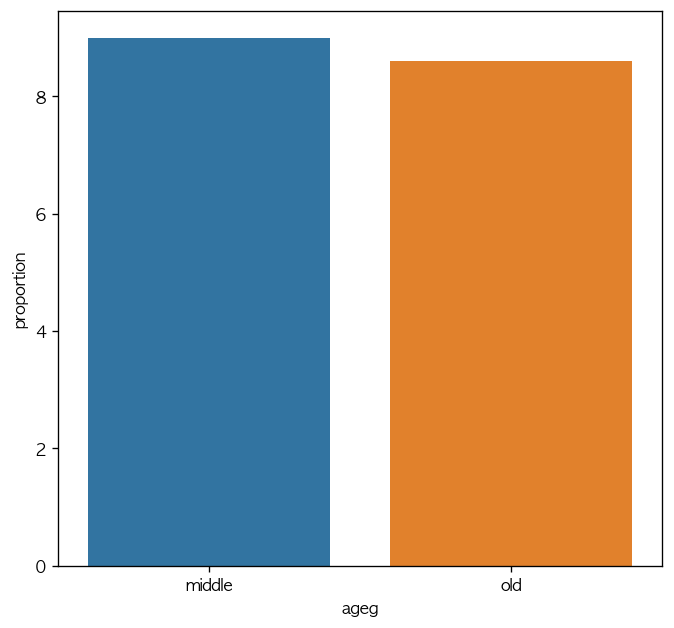

In [651]:
# 막대 그래프 만들기
sns.barplot(data = age_div, x = 'ageg', y = 'proportion')

In [652]:
# etc 제외, 초년층 제외
# ageg, religion별 분리
# marriage 추출
# 비율 구하기
age_rel_div = welfare.query('marriage != "etc" & ageg != "young"') \
                     .groupby(['ageg', 'religion'], as_index = False) \
                     ['marriage'] \
                     .value_counts(normalize = True)

age_rel_div

,ageg,religion,marriage,proportion
0,middle,no,marriage,0.904953
1,middle,no,divorce,0.095047
2,middle,yes,marriage,0.917520
3,middle,yes,divorce,0.082480
4,old,no,marriage,0.904382
5,old,no,divorce,0.095618
6,old,yes,marriage,0.922222
7,old,yes,divorce,0.077778


In [653]:
# divorce 추출
# 백분율로 바꾸기
# 반올림
age_rel_div = age_rel_div.query('marriage == "divorce"') \
                         .assign(proportion = age_rel_div['proportion'] * 100) \
                         .round(1)

age_rel_div

,ageg,religion,marriage,proportion
1,middle,no,divorce,9.5
3,middle,yes,divorce,8.2
5,old,no,divorce,9.6
7,old,yes,divorce,7.8


<Axes: xlabel='ageg', ylabel='proportion'>

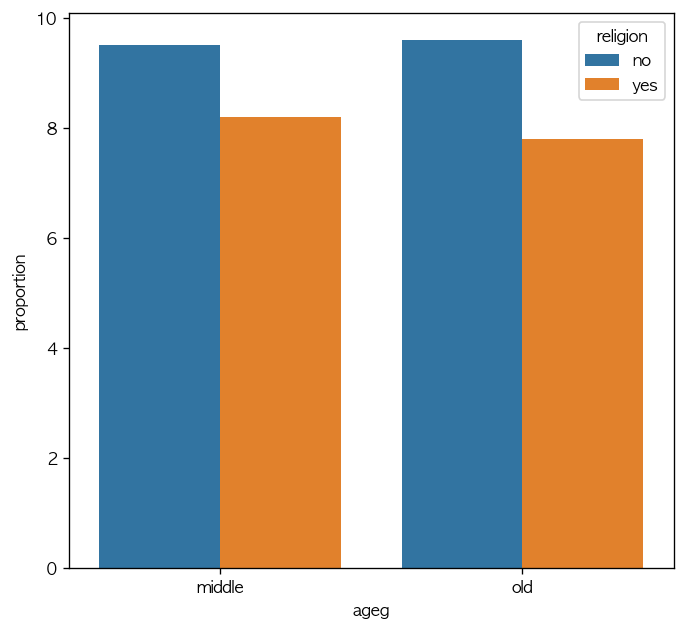

In [654]:
# 막대 그래프 만들기
sns.barplot(data = age_rel_div, x = 'ageg', y = 'proportion', hue = 'religion')

In [655]:
welfare['code_region'].dtypes  # 변수 타입 출력

dtype('float64')

In [656]:
welfare['code_region'].value_counts()  # 빈도 구하기

code_region
2.0    3246
7.0    2466
3.0    2448
1.0    2002
4.0    1728
5.0    1391
6.0    1137
Name: count, dtype: int64

In [657]:
# 지역 코드 목록 만들기
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region'      : ['서울',
                                             '수도권(인천/경기)',
                                             '부산/경남/울산',
                                             '대구/경북',
                                             '대전/충남',
                                             '강원/충북',
                                             '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [658]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [659]:
# region별 분리
# ageg 추출
# 비율 구하기
region_ageg = welfare.groupby('region', as_index = False) \
                     ['ageg'] \
                     .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [660]:
# 백분율로 바꾸기
# 반올림
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
                         .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<Axes: xlabel='proportion', ylabel='region'>

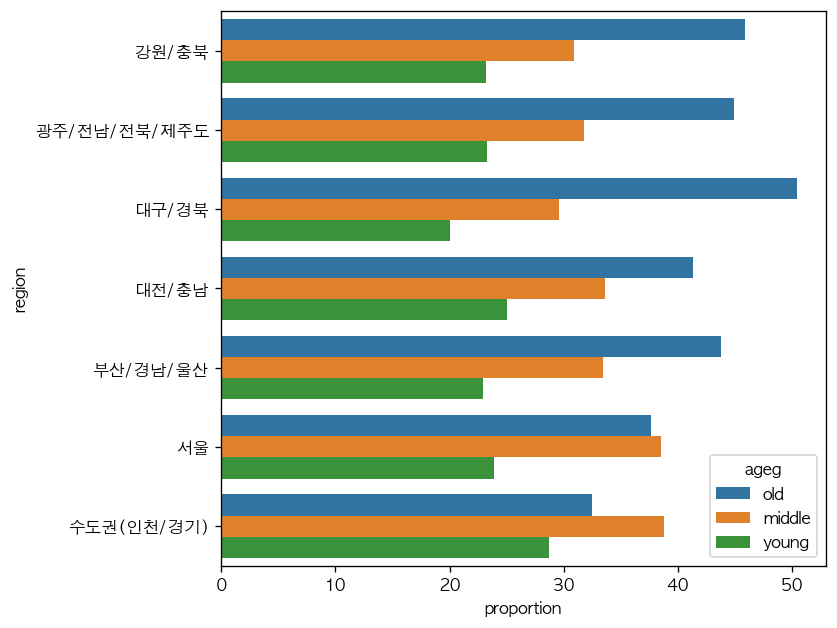

In [661]:
# 막대 그래프 만들기
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

In [662]:
# 피벗
pivot_df = region_ageg[['region', 'ageg', 'proportion']].pivot(index   = 'region',
                                                               columns = 'ageg',
                                                               values  = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


<Axes: ylabel='region'>

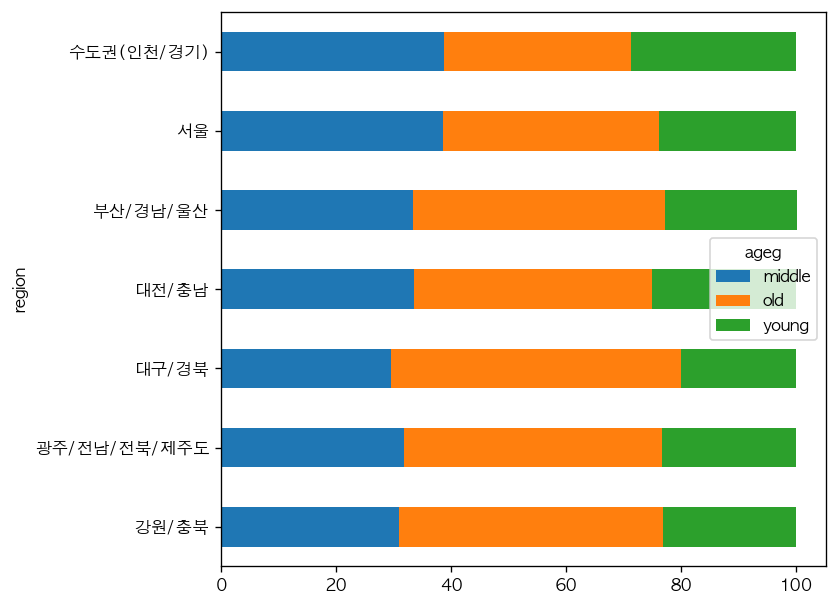

In [663]:
# 가로 막대 그래프 만들기
pivot_df.plot.barh(stacked = True)

In [664]:
# 노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<Axes: ylabel='region'>

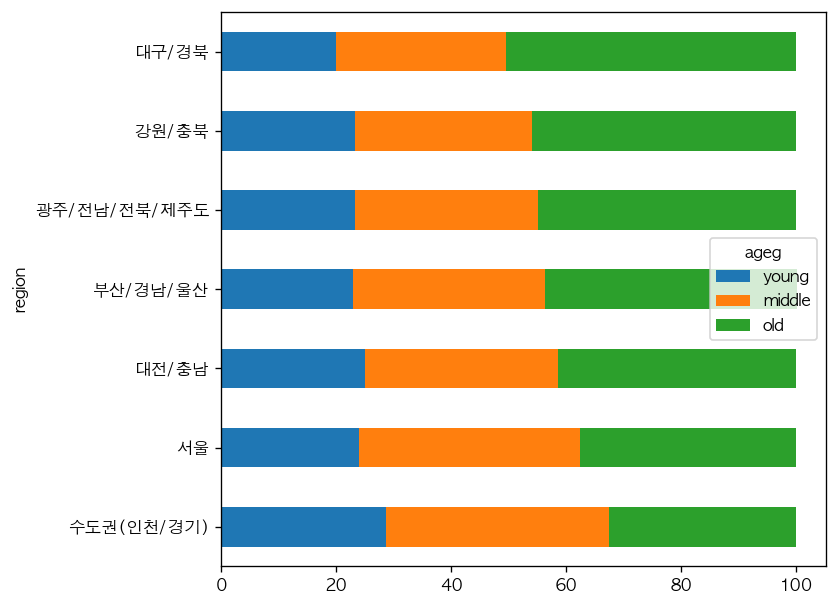

In [665]:
# 누적 가로 막대 그래프 만들기
reorder_df.plot.barh(stacked = True)

In [666]:
%pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [667]:
moon = open('./data/speech_moon.txt', encoding = 'UTF-8').read()
moon

'정권교체 하겠습니다!\n  정치교체 하겠습니다!\n  시대교체 하겠습니다!\n  \n  ‘불비불명(不飛不鳴)’이라는 고사가 있습니다. 남쪽 언덕 나뭇가지에 앉아, 3년 동안 날지도 울지도 않는 새. 그러나 그 새는 한번 날면 하늘 끝까지 날고, 한번 울면 천지를 뒤흔듭니다.\n\n그 동안 정치와 거리를 둬 왔습니다. 그러나 암울한 시대가 저를 정치로 불러냈습니다. 더 이상 남쪽 나뭇가지에 머무를 수 없었습니다. 이제 저는 국민과 함께 높이 날고 크게 울겠습니다. 오늘 저는 제18대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다.\n\n\n‘우리나라 대통령’이 되겠습니다.\n\n\n존경하는 국민 여러분!\n  \n  저는 대통령이 되겠습니다. 우리나라 대통령이 되겠습니다. 소수 특권층의 나라가 아니라 보통사람들이 주인인 ‘우리나라’, 네 편 내 편 편가르지 않고 함께 가는 우리나라, ‘우리’라는 말이 조금도 부끄럽지 않은, 진정한 ‘우리나라’의 대통령이 되겠습니다.\n\n지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다. 나라의 주인으로 행세하지 못했고, 주인으로 대접받지 못했습니다. 나서서 말도 하지 못했습니다. 이제 몸을 일으켜 날아야 합니다. 당당하게 말하고 정치에 참여해야 합니다.\n\n제가 추구하는 ‘우리나라’는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다. 저는 시민과 동행하는 정치를 하고 싶습니다. 제가 추구하는 ‘우리나라’는 특권과 불평등의 나라가 아니라, 보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다.\n\n이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다. 힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제, 낡은 정치, 낡은 권력도 모두 끝났습니다. 오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다.\n\n국민이 모두 아픕니다.\n\n제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고, 우리가 처한 현실이 너무도 엄중

In [668]:
# 불필요한 문자 제거하기
import re
moon = re.sub('[^가-힣]', ' ', moon)
moon

'정권교체 하겠습니다    정치교체 하겠습니다    시대교체 하겠습니다        불비불명       이라는 고사가 있습니다  남쪽 언덕 나뭇가지에 앉아   년 동안 날지도 울지도 않는 새  그러나 그 새는 한번 날면 하늘 끝까지 날고  한번 울면 천지를 뒤흔듭니다   그 동안 정치와 거리를 둬 왔습니다  그러나 암울한 시대가 저를 정치로 불러냈습니다  더 이상 남쪽 나뭇가지에 머무를 수 없었습니다  이제 저는 국민과 함께 높이 날고 크게 울겠습니다  오늘 저는 제  대 대통령선거 출마를 국민 앞에 엄숙히 선언합니다     우리나라 대통령 이 되겠습니다    존경하는 국민 여러분       저는 대통령이 되겠습니다  우리나라 대통령이 되겠습니다  소수 특권층의 나라가 아니라 보통사람들이 주인인  우리나라   네 편 내 편 편가르지 않고 함께 가는 우리나라   우리 라는 말이 조금도 부끄럽지 않은  진정한  우리나라 의 대통령이 되겠습니다   지금까지 우리 보통사람들은 날지도 울지도 못하는 새였습니다  나라의 주인으로 행세하지 못했고  주인으로 대접받지 못했습니다  나서서 말도 하지 못했습니다  이제 몸을 일으켜 날아야 합니다  당당하게 말하고 정치에 참여해야 합니다   제가 추구하는  우리나라 는 정치인에게 맡겨놓는 나라가 아니라 시민이 직접 정치와 정책과정에 참여하는 나라입니다  저는 시민과 동행하는 정치를 하고 싶습니다  제가 추구하는  우리나라 는 특권과 불평등의 나라가 아니라  보통사람들이 함께 기회를 가지는 공평하고 정의로운 나라입니다   이제 권력과 돈을 가진 집단이 나라를 그들 마음대로 움직이던 시대는 끝났습니다  힘없는 사람들에게 끝없이 희생을 강요하던 낡은 경제  낡은 정치  낡은 권력도 모두 끝났습니다  오늘 저 문재인은 우리나라를 우리 모두의 나라로 선언합니다   국민이 모두 아픕니다   제가 높이 날고 크게 울겠다고 결심한 이유는 보통사람들의 삶이 너무 고달프고  우리가 처한 현실이 너무도 엄중하기 때문입니다  근본적인 혁신  거대한 전

In [669]:
# hannanum 만들기
import konlpy
hannanum = konlpy.tag.Hannanum()

In [670]:
# 명사 추출하기
hannanum.nouns("대한민국의 영토는 한반도와 그 부속도서로 한다")

['대한민국', '영토', '한반도', '부속도서']

In [671]:
# 연설문에서 명사 추출하기
nouns = hannanum.nouns(moon)
# nouns

In [672]:
# 데이터 프레임으로 변환
import pandas as pd
df_word = pd.DataFrame({'word' : nouns})
df_word

,word
0,정권교체
1,정치교체
2,시대교체
3,불비불명
4,고사
...,...
1408,모두
1409,주인
1410,진정한
1411,우리나라


In [673]:
# 글자 수 추가
df_word['count'] = df_word['word'].str.len()
df_word

,word,count
0,정권교체,4
1,정치교체,4
2,시대교체,4
3,불비불명,4
4,고사,2
...,...,...
1408,모두,2
1409,주인,2
1410,진정한,3
1411,우리나라,4


In [674]:
# 두 글자 이상 단어만 남기기
df_word = df_word.query('count >= 2')
df_word.sort_values('count')

,word,count
712,국민,2
1164,가사,2
1163,숙제,2
1162,평등,2
644,확대,2
...,...,...
707,평생학습체제,6
1268,군사대결지대,6
173,성적스트레스,6
978,고용영향평가제도,8


In [675]:
## 단어 빈도 구하기

# 단어별 분리
# 빈도 구하기
# 내림차순 정렬
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_word

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
...,...,...
278,북핵문제,1
279,분단,1
281,분야,1
283,분쟁,1


In [676]:
# 단어 빈도 상위 20개 추출
top20 = df_word.head(20)
top20

,word,n
153,나라,19
462,일자리,19
116,국민,18
422,우리,17
198,대통령,12
202,대한민국,11
693,확대,11
525,정치,10
423,우리나라,10
304,사회,9


<Axes: xlabel='n', ylabel='word'>

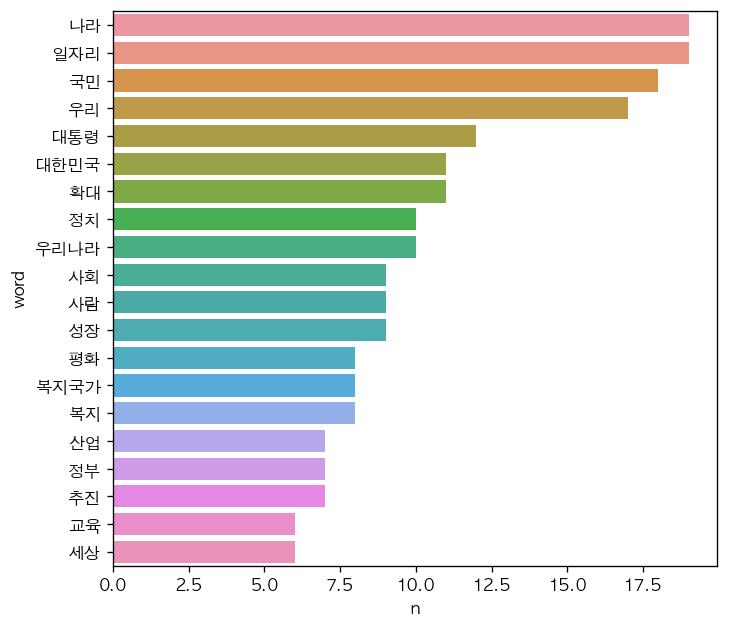

In [677]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family'    : 'AppleGothic',  # 한글 폰트 설정
                     'figure.dpi'     : '120',            # 해상도 설정
                     'figure.figsize' : [6.5, 6]})        # 가로 세로 크기 설정

# 막대 그래프 만들기
sns.barplot(data = top20, y = 'word', x = 'n')

In [678]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [679]:
font = './data/DoHyeon-Regular.ttf'

In [680]:
# 데이터 프레임을 딕셔너리로 변환
dic_word = df_word.set_index('word').to_dict()['n']
# dic_word

In [681]:
# wc 만들기
from wordcloud import WordCloud
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white')  # 배경색

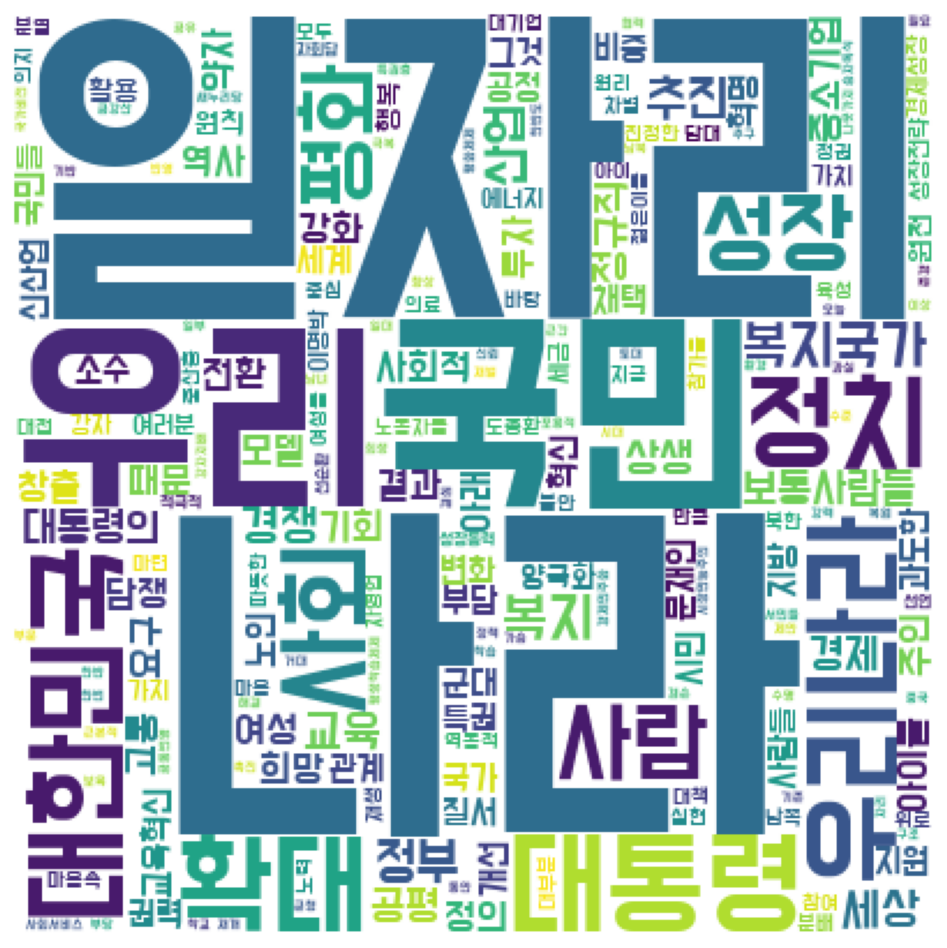

In [682]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력

In [683]:
%pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [684]:
import PIL
icon = PIL.Image.open('./data/cloud.png')

In [685]:
import numpy as np
img = PIL.Image.new('RGB', icon.size, (255, 255, 255))
img.paste(icon, icon)
img = np.array(img)

In [686]:

# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img)                  # mask 설정

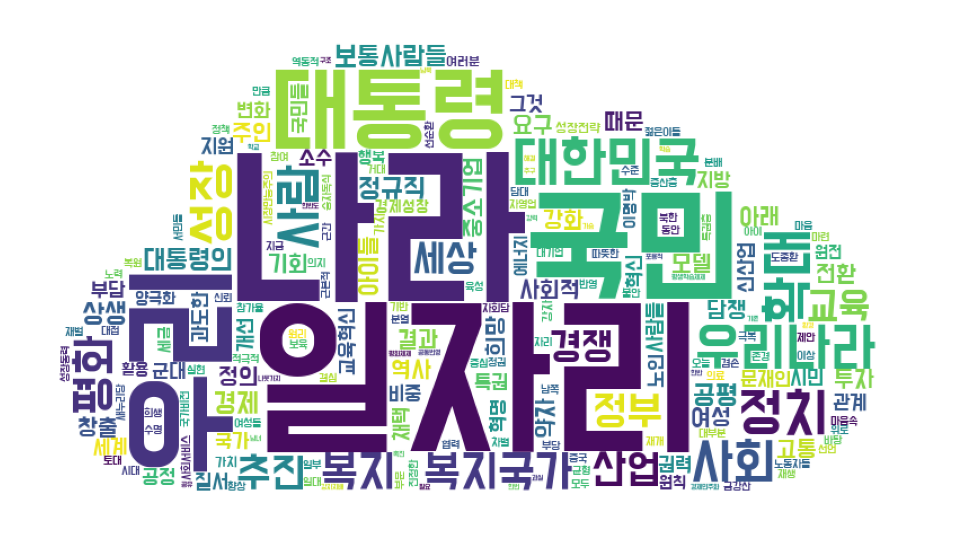

In [687]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력

In [688]:
# wc 만들기
wc = WordCloud(random_state = 1234,         # 난수 고정
               font_path = font,            # 폰트 설정
               width = 400,                 # 가로 크기
               height = 400,                # 세로 크기
               background_color = 'white',  # 배경색
               mask = img,                  # mask 설정
               colormap = 'inferno')        # 컬러맵 설정

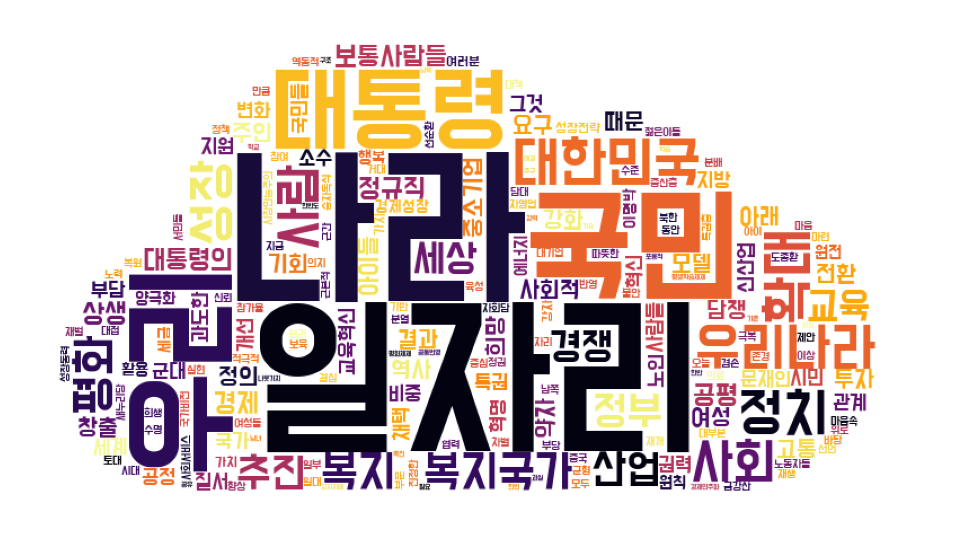

In [689]:
# 워드 클라우드 만들기
img_wordcloud = wc.generate_from_frequencies(dic_word)

# 워드 클라우드 출력하기
plt.figure(figsize = (10, 10))  # 가로, 세로 크기 설정
plt.axis('off')                 # 테두리 선 없애기
plt.imshow(img_wordcloud)       # 워드 클라우드 출력

In [690]:
import pandas as pd
df = pd.read_csv("./data/news_comment_BTS.csv", encoding='UTF-8')

In [691]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [692]:
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex=True)

In [693]:
df['reply'].head()

0                                    국보소년단            
1                                         아줌마가 들어도 좋더라
2    팩트체크  현재 빌보드           위  방탄소년단       위       ...
3              방탄소년단이 한국사람이라 너무 자랑스러워요    우리오래오래 함께하자 
4                  대단한      월드 클래스는 다르네   좋은 소식   응원해요
Name: reply, dtype: object

In [694]:
import konlpy
kkma = konlpy.tag.Kkma()

In [695]:
nouns = df['reply'].apply(kkma.nouns)
nouns

                                                                                    
java.lang.NullPointerException
                                                            
java.lang.NullPointerException
  
java.lang.NullPointerException
                
java.lang.NullPointerException
                
java.lang.NullPointerException
                                                                   
java.lang.NullPointerException
                  
java.lang.NullPointerException
    
java.lang.NullPointerException
  
java.lang.NullPointerException
                                    
java.lang.NullPointerException
                                                                                                                        
java.lang.NullPointerException
   
java.lang.NullPointerException


0                                        [국보, 국보소년단, 소년단]
1                                                   [아줌마]
2                   [팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]
3              [방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]
4                                       [월드, 클래스, 소식, 응원]
                              ...                        
1195                                                   []
1196                                      [우리, 탄, 자랑, 사랑]
1197                                              [애, 군대]
1198                                     [군, 군면제급, 면제, 급]
1199    [자랑, 축하, 김, 김남, 남, 김석진, 민, 민윤기, 윤기, 정, 정호석, 호석...
Name: reply, Length: 1200, dtype: object

In [696]:
nouns2 = nouns.explode()

In [697]:
df_word = pd.DataFrame({'word': nouns2})

df_word['count'] = df_word['word'].str.len()

df_word = df_word.query('count >= 2')

df_word

,word,count
0,국보,2.0
0,국보소년단,5.0
0,소년단,3.0
1,아줌마,3.0
2,팩트,2.0
...,...,...
1199,박지,2.0
1199,박지민,3.0
1199,김태형,3.0
1199,전정국,3.0


In [698]:
df_word = df_word.groupby('word', as_index= False).agg(n = ('word', 'count')).sort_values('n', ascending=False)

df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
1136,실력있음,1
406,다음주면,1
1134,신화,1
1133,신중,1


In [701]:
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


In [702]:
plt.rcParams.update({'figure.figsize' : [6.5, 6]})

<Axes: xlabel='n', ylabel='word'>

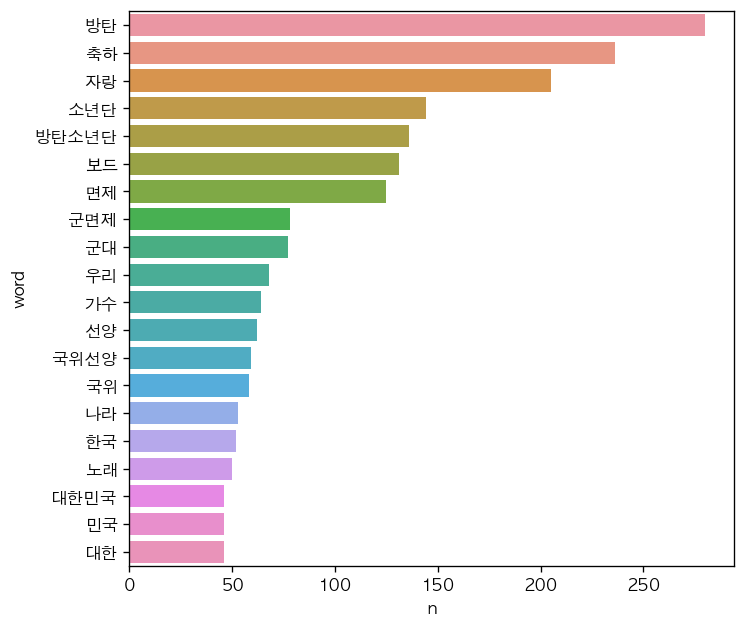

In [703]:
sns.barplot(data = top20, y = 'word', x= 'n')

In [704]:
dict_word = df_word.set_index('word').to_dict()['n']

In [705]:
wc = WordCloud(random_state=1234, font_path= font, width = 400, height= 400, background_color='white', mask=img)

In [706]:
img_wordcloud = wc.generate_from_frequencies(dic_word)

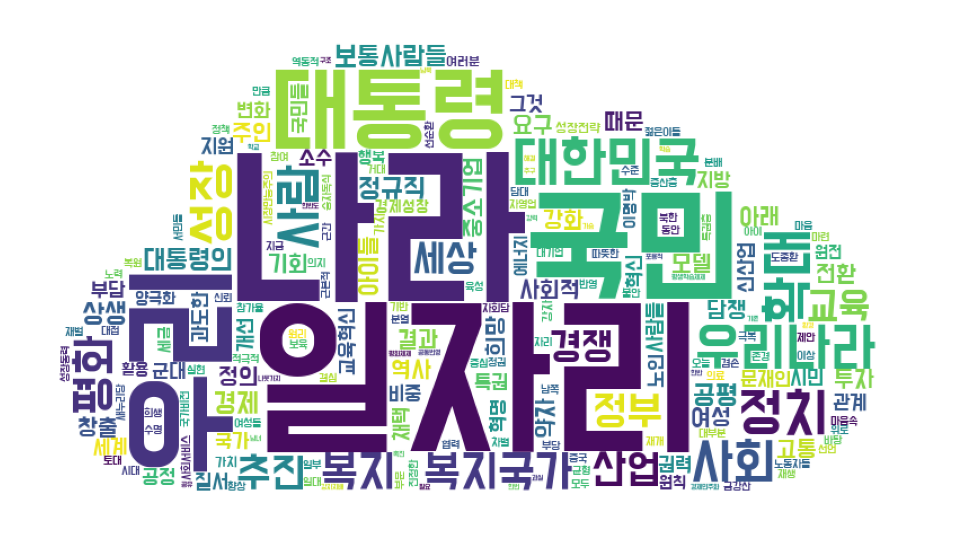

In [707]:
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(img_wordcloud)